## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [2]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_russia = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_russia.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: Russia


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast
2,russia,01/03/1970,28.1,20.9,25.5,7.9,NaN,0.0,NaN,18.3,NaN,3.7,92.5,91.09,Overcast
3,russia,01/04/1970,26.9,20.9,22.7,6.9,NaN,0.0,NaN,16.1,NaN,3.7,97.5,89.49,Overcast
4,russia,01/05/1970,32.1,28.1,29.5,18.2,NaN,0.0,NaN,16.1,NaN,2.7,100.0,92.43,Overcast


### Random Slice of Data
<hr>

In [3]:
df_russia.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
4939,russia,01/12/1985,18.8,8.7,13.5,-5.4,NaN,0.0,NaN,13.9,NaN,2.1,89.8,86.27,Overcast
6644,russia,09/13/1989,50.1,35.0,44.3,34.2,NaN,0.0,NaN,13.9,NaN,6.2,43.8,70.12,Partially cloudy
5975,russia,11/14/1987,32.1,26.7,30.3,16.4,NaN,0.0,NaN,11.4,NaN,1.2,94.1,97.65,Overcast
15705,russia,07/05/2014,72.9,56.5,66.1,NaN,NaN,0.0,NaN,12.0,NaN,6.2,37.7,62.15,Partially cloudy
14953,russia,06/13/2012,66.6,57.6,62.0,NaN,NaN,0.2,NaN,8.9,NaN,5.6,74.8,81.34,"Rain, Partially cloudy"


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [4]:
df_russia.shape

(18019, 15)

In [5]:
#printing missing data sum
df_russia.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              4957
Heat Index             17141
Precipitation              0
Snow Depth             12669
Wind Speed                 0
Wind Gust              17186
Visibility                 0
Cloud Cover                0
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

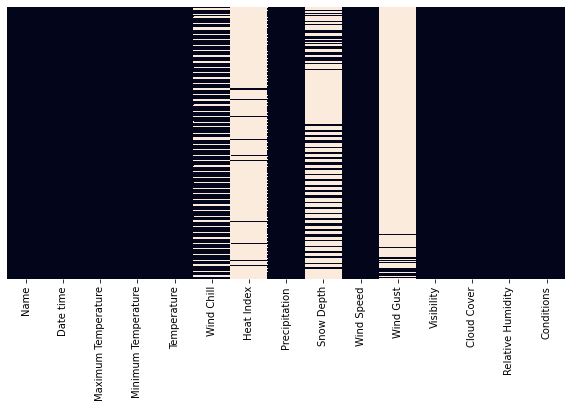

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df_russia.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [7]:
df_russia.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [8]:
df_russia.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18014,russia,10/30/2020,42.1,36.0,39.6,0.0,6.7,6.2,73.0,81.37,Partially cloudy
18015,russia,10/31/2020,46.4,39.8,43.0,0.0,10.4,5.9,94.4,83.85,Overcast
18016,russia,11/01/2020,44.0,39.1,41.4,0.0,15.9,5.7,93.4,86.20,Overcast
18017,russia,11/02/2020,43.9,39.1,41.7,0.0,11.1,3.0,99.8,97.14,Overcast
18018,russia,11/03/2020,46.3,42.0,43.9,0.0,9.6,3.4,98.0,95.67,Overcast


In [9]:
#Mean Imputing for visibility and Cloud Cover
df_russia['Visibility'].fillna(df_russia['Visibility'].mean(), inplace = True)
df_russia['Cloud Cover'].fillna(df_russia['Cloud Cover'].mean(), inplace = True)
print(df_russia.isnull().sum())

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [10]:
#minimum value for temperature
df_russia['Temperature'].min()

-32.2

In [11]:
#maximum value for temperature
df_russia['Temperature'].max()

86.4

In [12]:
#minimim value for temperature
df_russia['Precipitation'].min()

0.0

In [13]:
#maximum value for precipitation
df_russia['Precipitation'].max()

37.92

In [14]:
#ToDO - Update feature details

In [15]:
#Todo:How Windspeed is Effecting Temperature
#Todo: How Humidity affects Temperature

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [16]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_russia.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_russia['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [17]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.0,13.9,6.2,48.3,84.54
1,0.0,18.3,3.1,87.5,89.14
2,0.0,18.3,3.7,92.5,91.09
3,0.0,16.1,3.7,97.5,89.49
4,0.0,16.1,2.7,100.0,92.43


In [18]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [19]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_russia.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_russia['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [20]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

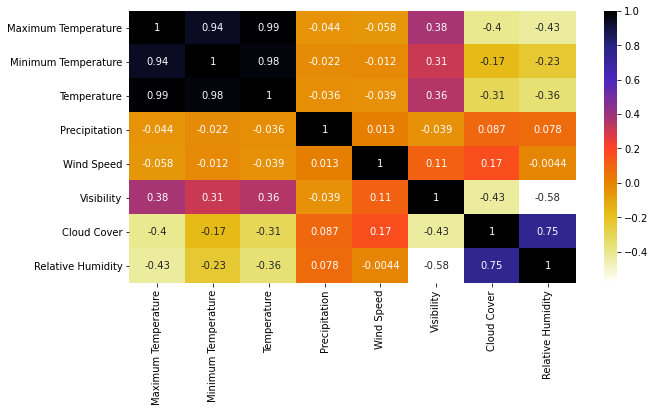

In [21]:
plt.figure(figsize=(10,5))
c= df_russia.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is slightly correlated with Visibility and has a slight negative correlation with Relative Humidity, Cloud Cover and other two features

For `Precipitation`, It is not not correlated with feature and these are negligible values

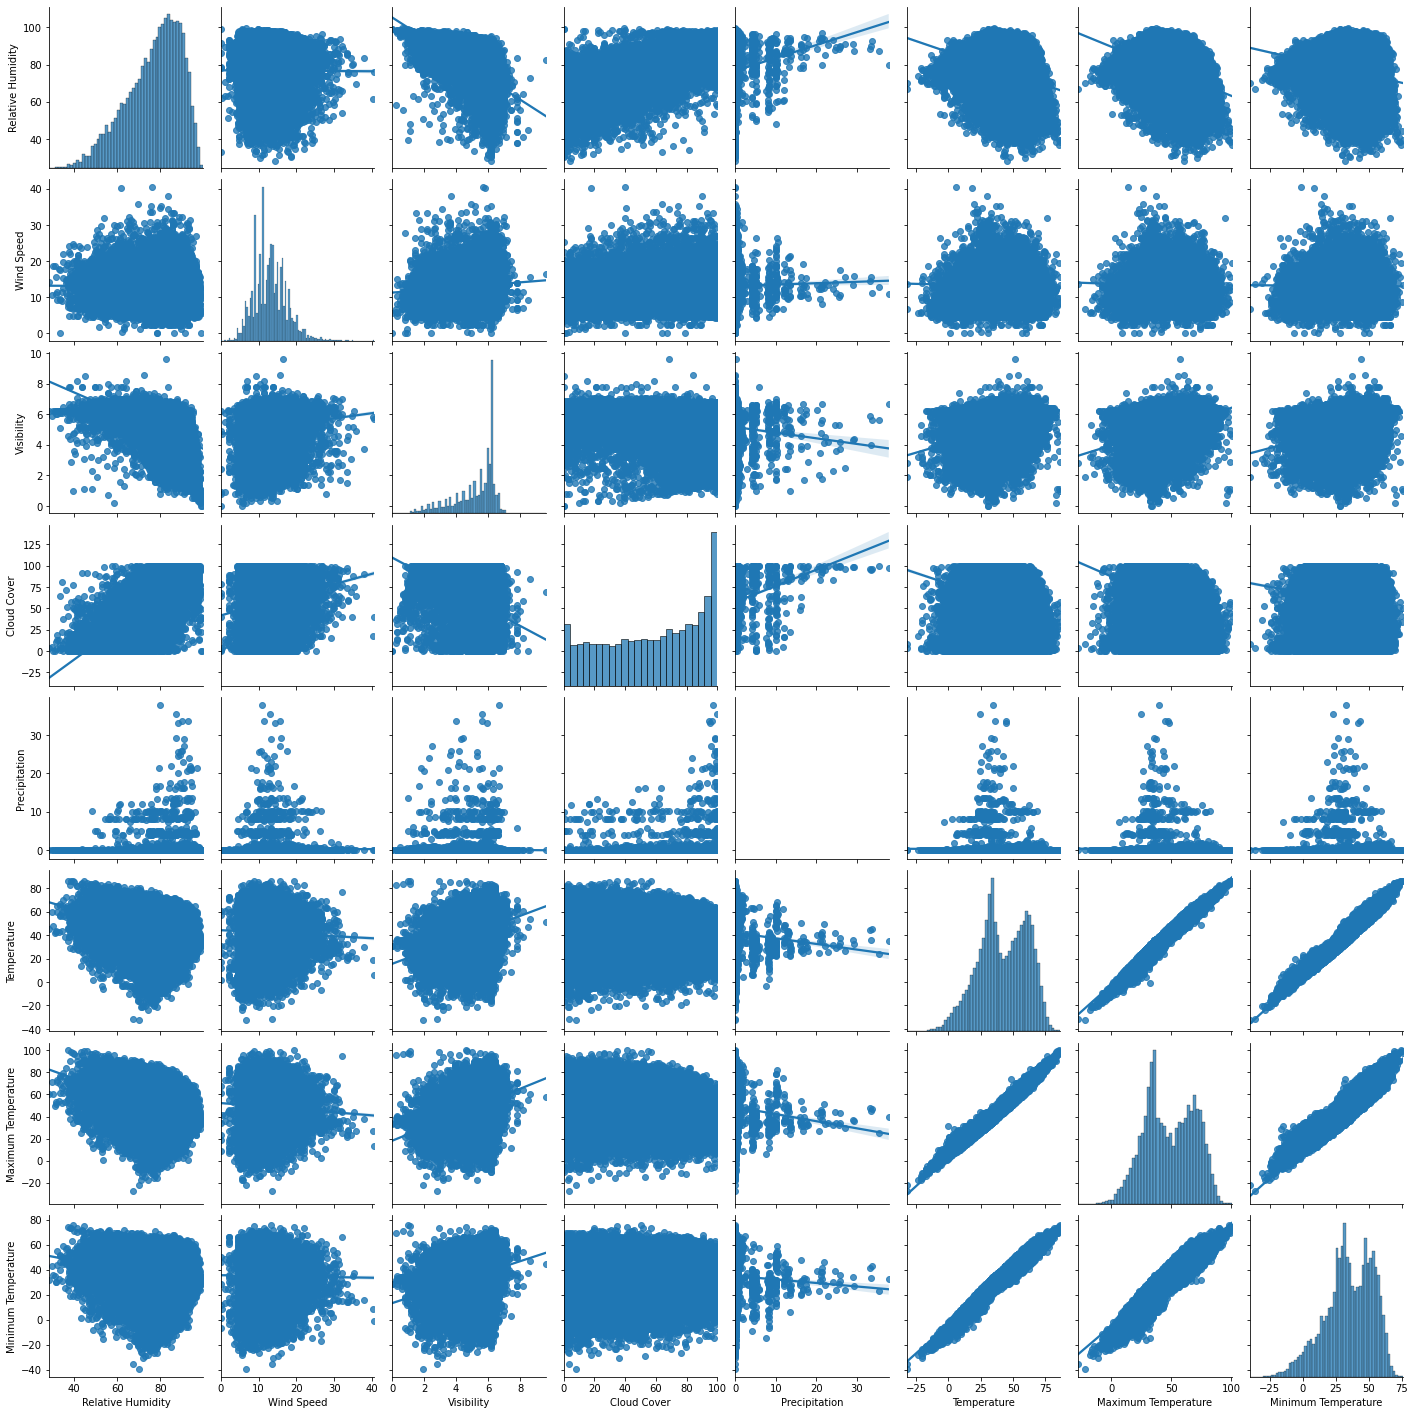

In [22]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_russia[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship, with respect to other features , we can see there is no linear relation expect for Relative Humidity , it is inverse

For Precipitation, We can see a relation between Maximum temperature,minimum temperature and Temperature have slight linear relation with it, Remaining feature such as cloud cover , relative humidity are partially linear

#### 3.3 Using Feature Transformation for conditions

In [22]:
df_russia['Conditions'] = df_russia['Conditions'].astype('category')

In [23]:
df_russia_conditions = pd.get_dummies(df_russia['Conditions'])

In [24]:
df_russia  = pd.concat([df_russia,df_russia_conditions],axis=1)

In [25]:
df_russia.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,russia,01/01/1970,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy,0,0,1,0,0,0,0,0,0
1,russia,01/02/1970,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast,0,1,0,0,0,0,0,0,0
2,russia,01/03/1970,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast,0,1,0,0,0,0,0,0,0
3,russia,01/04/1970,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast,0,1,0,0,0,0,0,0,0
4,russia,01/05/1970,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast,0,1,0,0,0,0,0,0,0


## Regression

(array([   8.,   63.,  382., 1161., 2389., 4324., 2926., 3843., 2695.,
         228.]),
 array([-32.2 , -20.34,  -8.48,   3.38,  15.24,  27.1 ,  38.96,  50.82,
         62.68,  74.54,  86.4 ]),
 <BarContainer object of 10 artists>)

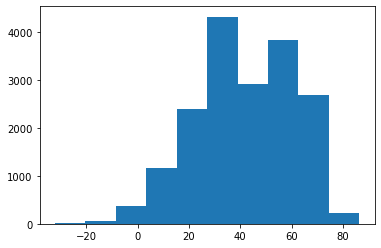

In [26]:
plt.hist(df_russia['Temperature'])

(array([1.7737e+04, 1.1200e+02, 1.0300e+02, 2.8000e+01, 1.4000e+01,
        1.0000e+01, 7.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.   ,  3.792,  7.584, 11.376, 15.168, 18.96 , 22.752, 26.544,
        30.336, 34.128, 37.92 ]),
 <BarContainer object of 10 artists>)

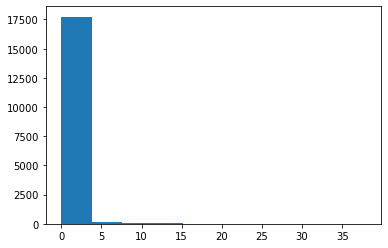

In [27]:
plt.hist(df_russia['Precipitation'])

#### Segregating variables: Independent and Dependent Variables for Temperature

In [28]:
X_temp=df_russia.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Conditions','Name','Date time'],axis=1)
Y_temp=df_russia.Temperature

#### Importing the train test split function for Temperature

In [29]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp)

In [30]:
train_X_temp.head()

,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
5455,9.2,6.2,0.0,58.95,1,0,0,0,0,0,0,0,0
4249,12.5,6.1,76.5,75.51,0,1,0,0,0,0,0,0,0
14068,5.2,5.1,22.5,84.86,0,0,0,0,0,0,1,0,0
7008,11.4,5.0,95.6,89.21,0,1,0,0,0,0,0,0,0
10344,2.2,4.8,70.0,86.07,0,0,1,0,0,0,0,0,0


In [31]:
train_y_temp.head()

5455     68.7
4249     19.7
14068     0.5
7008     48.0
10344    40.4
Name: Temperature, dtype: float64

In [32]:
#getting the shape for training data
train_X_temp.shape

(13514, 13)

In [33]:
train_y_temp.shape

(13514,)

In [34]:
#getting the shape for test data
test_X_temp.shape

(4505, 13)

### 1. Implementing Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
import math

In [36]:
lr = LR(normalize=True)
lr.fit(train_X_temp,train_y_temp)
y_pred_1=lr.predict(test_X_temp)

In [37]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_temp)
k = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(k) )

Training Root Mean Squared Error 14.21695721099469


In [38]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
k = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(k))

Test Root Mean Squared Error 14.178350853787112


### Ridge Regression

In [39]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_temp,train_y_temp)
y_predict=model.predict(test_X_temp)

In [40]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_temp)
ridge_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

Training Root Mean Squared Error 14.216967490572898


In [41]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
ridge_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )
ridge_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Ridge regression',ridge_r2_score)

Test Root Mean Squared Error 14.178350853787112
R2 Square Error for Ridge regression 0.4551276564104605


### Residual Plot in Ridge Regression

Text(0.5, 1.0, 'Residual plot in Ridge Regression')

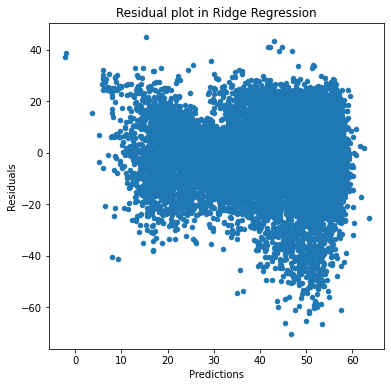

In [42]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Ridge Regression")

### Knn Algorithm

In [43]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

In [44]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_temp,train_y_temp)
y1_knn=knn.predict(test_X_temp)

In [45]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 11.579631704672867


In [46]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

Test Root Mean Squared Error 14.23332653925002
R2 Square Error for KNN regression 0.4508940463519946


### Residual plot in KNN

Text(0.5, 1.0, 'Residual plot in KNN Regression')

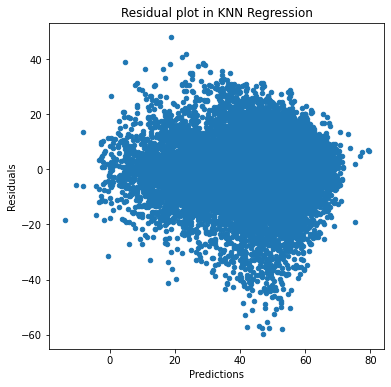

In [47]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Gradient Boosting Regressor

In [48]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_X_temp,train_y_temp)

[17:09:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [49]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 12.957103068582418


In [50]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

Test Root Mean Squared Error 13.26726031069142
R2 Square Error for Gradient Boosting regression 0.5229039431595108


### Decision Tree Regressor

In [51]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_temp,train_y_temp)

DecisionTreeRegressor(max_depth=1)

In [52]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 17.71730535326669


In [53]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

Test Root Mean Squared Error 17.947588466943397
R2 Square Error for Decision Tree regression 0.12691700011091267


### Residual Plot in Decision Tree Regressor

Text(0.5, 1.0, 'Residual plot in Decision Tree Regression')

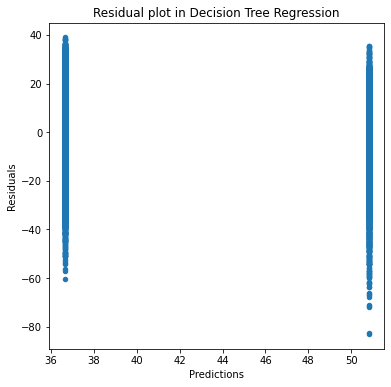

In [54]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

### 3. Support Vector Regression for Temperature

#### Pre processing features

In [55]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_temp,train_y_temp)
pred1=model1.predict(test_X_temp)

In [56]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 14.512058475818884


In [57]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

Test Root Mean Squared Error 14.379831189250265
R2 Square Error for SVM regression 0.4395318961880579


### Residual Plot for Support Vector Machine

Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

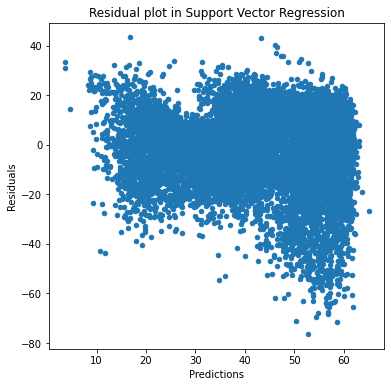

In [58]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [59]:
train_error=[ridge_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[ridge_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Gradient Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,14.216967,14.178351
K-Nearest,11.579632,14.233327
Gradient Boost,12.957103,13.267260
Decision Tree,17.717305,17.947588
SVM,14.512058,14.379831


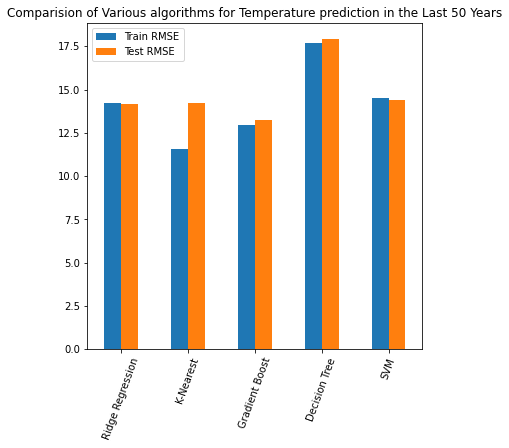

In [60]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Getting the Graph for all Models Test R2 Square Error

In [61]:
test_r2_square_error=[ridge_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square Error':[i for i in test_r2_square_error]}
models=['Ridge Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Test R2 Square Error
Ridge Regression,0.455128
K-Nearest,0.450894
Gradent Boost,0.522904
Decision Tree,0.126917
SVM,0.439532


Text(0.5, 1.0, 'R2 Square for Various Models')

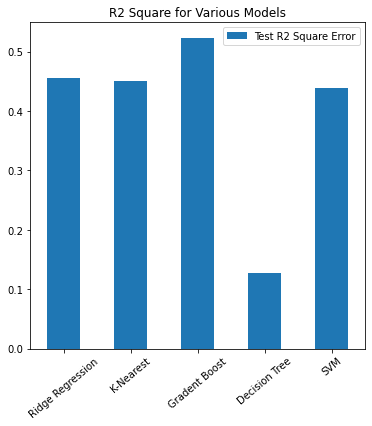

In [62]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [63]:
X_prec=df_russia.drop(columns=['Precipitation','Conditions','Name','Date time'],axis=1)
Y_prec=df_russia.Precipitation

In [64]:
X_prec.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,10.1,-2.1,4.7,13.9,6.2,48.3,84.54,0,0,1,0,0,0,0,0,0
1,19.1,-3.9,10.4,18.3,3.1,87.5,89.14,0,1,0,0,0,0,0,0,0
2,28.1,20.9,25.5,18.3,3.7,92.5,91.09,0,1,0,0,0,0,0,0,0
3,26.9,20.9,22.7,16.1,3.7,97.5,89.49,0,1,0,0,0,0,0,0,0
4,32.1,28.1,29.5,16.1,2.7,100.0,92.43,0,1,0,0,0,0,0,0,0


#### Importing the train test split function for Precipitation

In [65]:
from sklearn.model_selection import train_test_split
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec)

### Ridge Regression

In [66]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_prec,train_y_prec)
y_predict=model.predict(test_X_prec)

In [67]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_prec)
ridge_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

Training Root Mean Squared Error 1.3905431762095153


In [68]:
# Predicting over the Test Set and calculating error
test_predict = model.predict(test_X_prec)
ridge_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )

Test Root Mean Squared Error 1.427879991729484


### Knn Algorithm

In [69]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

In [70]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [71]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 1.2451091140677537


In [73]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 1.5557265120335815


### Decision Tree Regressor

In [74]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

DecisionTreeRegressor(max_depth=1)

In [75]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 1.4040607527374946


In [76]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error))

Test Root Mean Squared Error 1.4461402121910398


### Gradient Boosting Regressor

In [77]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

[17:10:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [78]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 1.2938038141797066


In [79]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

Test Root Mean Squared Error 1.4320806765824272


###  Support Vector Regression for Precipitation

In [80]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [81]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 1.415112056115185


In [82]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error))

Test Root Mean Squared Error 1.4481936958490356


### Getting the Graph for all Models RMSE

In [83]:
train_error=[ridge_train_error,knn_train_error,dec_train_error,svm_train_error,xgb_train_error]
test_error=[ridge_test_error,knn_test_error,dec_test_error,svm_test_error,xgb_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Decision Tree','SVM','Gradient Boost']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,1.390543,1.427880
K-Nearest,1.245109,1.555727
Decision Tree,1.404061,1.446140
SVM,1.415112,1.448194
Gradient Boost,1.293804,1.432081


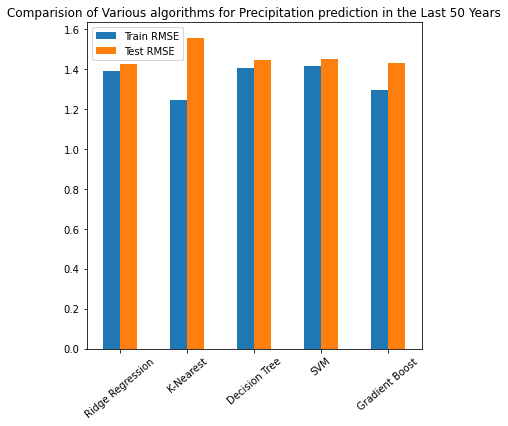

In [84]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.show()